In [2]:
import os
import numpy as os
import nibabel as nib
from nilearn.image import resample_to_img
from nilearn import plotting
from nilearn.image import load_img
from nilearn.image import iter_img

Shape comparison:
- Original t-map image shape : (91, 109, 91)
- Resampled t-map image shape : (61, 72, 55)
- Template image shape : (91, 109, 91)

Affine comparison:
- Original t-map image affine : 
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine : 
 [[   3.2190001    0.           0.         -96.5      ]
 [   0.           3.2190001    0.        -132.5      ]
 [   0.           0.           3.5999999  -78.5      ]
 [   0.           0.           0.           1.       ]]
- Template image affine : 
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



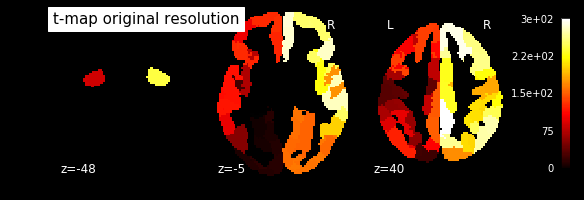

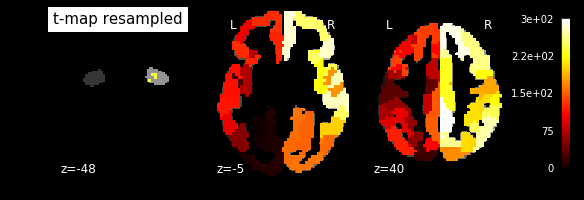

In [3]:
# Load the template image
template_img = load_img('Schaefer2018_300Parcels_7Networks_order_FSLMNI152_2mm.nii.gz')

# Display header information of the template
template_img_header = template_img.header
#print(template_img_header)

# Resample the template image to epi
resampled_template_img = resample_to_img(template_img,
                                     'sub-GAB007_task-Rest3_space-MNI152NLin2009cAsym_desc-preproc_bold_dbscan.nii.gz',
                                     interpolation='nearest')

# Display header information of the resampled_template
resampled_template_img_header = resampled_template_img.header
#print(resampled_template_img_header)

# Display the orginal image shapes
original_template_img_shape = template_img.shape
#print(original_template_img_shape)

original_template_img_affine = template_img.affine
#print(original_template_img_affine)

# Display the resampled image shapes
resampled_template_img_shape = resampled_template_img.shape
#print(resampled_template_img_shape)

resampled_template_img_affine = resampled_template_img.affine
#print(resampled_template_img_affine)

# Display the orginal and resampled image shapes to comapare the change

template_img = load_img(template_img)
template_shape = template_img.shape
template_affine = template_img.affine
print ("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape : {1}
- Template image shape : {2}
""".format(original_template_img_shape, resampled_template_img_shape, template_shape))

print ("""Affine comparison:
- Original t-map image affine : \n {0}
- Resampled t-map image affine : \n {1}
- Template image affine : \n {2}
""".format(original_template_img_affine, resampled_template_img_affine, template_affine))


plotting.plot_stat_map(template_img, 
                       display_mode="z",
                       bg_img = template_img,
                       threshold=3,
                       cut_coords = (-5.73, -48.63, 40.11),
                       title="t-map original resolution")

plotting.plot_stat_map(resampled_template_img,
                       display_mode="z", 
                       bg_img = template_img,
                       threshold=3,
                       cut_coords = (-5.73, -48.63, 40.11),
                       title="t-map resampled")

plotting.show()

# Save resampled power.nii image
resampled_template_img.to_filename('Schaefer2018_300Parcels_7Networks_order_FSLMNI152_dbscan.nii.gz')